In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [36]:
# Load data for an exemple file
filename = "Ent_CamK2_15_S05"
data_per_stim = np.load('Mice_data/'+filename+'_response_per_stim_block.npy')
Event_per_stim = np.load('Mice_data/'+filename+'_stim_per_block.npy', allow_pickle=True)

In [37]:
# Parameters
number_stim = len(Event_per_stim)
window_before = 5
window_after = 40
Sampling_freq = 100

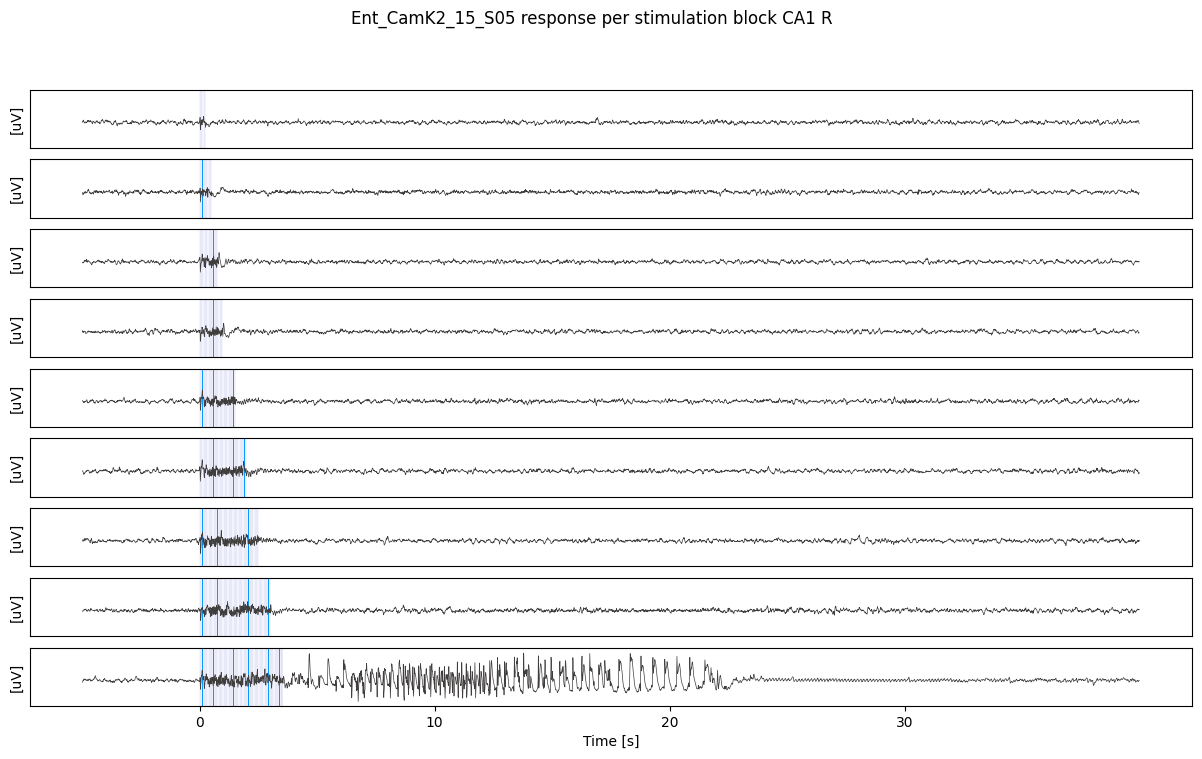

In [38]:
# Plot all block of stimulations
fig1 = plt.figure(filename + '_stimulation_block', figsize=(15, 8)).suptitle(filename + ' response per stimulation block CA1 R')
gridspec.GridSpec(number_stim, 12)
x = np.arange(-window_before, window_after, 1 / Sampling_freq)
i = 0
max = np.max(data_per_stim) *1.2
min = np.min(data_per_stim) *1.2
for data in data_per_stim:
    ax = plt.subplot2grid((number_stim, 12), (i, 0), rowspan=1, colspan=12)
    ax.plot(x, data, color='#403d3d', lw=0.5)
    for pulse in Event_per_stim[i]:
        ax.axvspan(pulse / Sampling_freq, pulse / Sampling_freq + 0.003,edgecolor='#1B2ACC', facecolor='#089FFF', linestyle="--", lw=0.05)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_ylabel('[uV]')
    ax.set_ylim(bottom=min, top=max)
    i += 1
    if i == number_stim:
        ax.set_xlabel('Time [s]')
        ax.set_xticks([0,10,20,30])